In [68]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

%matplotlib inline
mpl.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20, 13)

In [69]:
df = pd.read_csv('BBC_videos_details.csv')
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24443 entries, 0 to 24442
Data columns (total 16 columns):
Unnamed: 0        24443 non-null int64
id                24443 non-null object
title             24443 non-null object
description       24245 non-null object
category_id       24443 non-null int64
view_count        24440 non-null float64
like_count        9084 non-null float64
dislike_count     9084 non-null float64
favorite_count    24443 non-null int64
comment_count     23601 non-null float64
tags              23603 non-null object
published_at      24443 non-null object
duration_hours    24443 non-null int64
duration_mins     24443 non-null int64
duration_secs     24443 non-null int64
was_live          24443 non-null bool
dtypes: bool(1), float64(4), int64(6), object(5)
memory usage: 2.8+ MB
None


,Unnamed: 0,id,title,description,category_id,view_count,like_count,dislike_count,favorite_count,comment_count,tags,published_at,duration_hours,duration_mins,duration_secs,was_live
5820,5820,LE6kk564v1g,"""ما زال موقع المرأة العربية غير متساوياً مع ال...",#دنيانا تتناول واقع القبائل والعشائر في العالم...,25,821.0,1.0,0.0,0,0.0,['#دنيانا #الأردن #الصومال #السودان #العراق #ا...,2015-03-26 14:26:12,0,6,50,False
2829,2829,HyYHYv48qAo,"#SEXTING بي_بي_سي_ترندينغ | ما هو الـ ""سيكستينغ""؟",للمزيد من الفيديوهات زوروا صفحتنا http://www.b...,25,1121.0,12.0,2.0,0,1.0,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",2017-10-20 17:03:54,0,4,3,False
16451,16451,y1SD5WmoCEg,الرئيس المصري يدعو الى رحيل الأسد,قال الرئيس المصري محمد مرسي ان مصر تدعم خيار ا...,25,12365.0,NaN,NaN,0,0.0,"['مصر،', 'مرسي،', 'بي', 'سي', '،', 'الاسد،', '...",2012-08-28 09:38:25,0,1,9,False
14618,14618,AfIPoiBiI5A,باكستان: مقتل 20 شخصاً في تفجير استهدف مسجداً ...,قال مراسل بي بي سي عربي في باكستان ان عدد قتلى...,25,276.0,NaN,NaN,0,0.0,"['باكستان،', 'الشيعة،', 'السنة،', 'مسجد،', 'قت...",2013-02-01 14:38:39,0,2,57,False
17641,17641,i9pwZpi7na0,أجندة مفتوحة فرانسوا هولند يتولي زمام الحكم,وسط ترقب كبيرداخل فرنسا وخارجها تولى الرئيس ا...,25,273.0,2.0,0.0,0,2.0,"['بي بي سي', 'فرانسوا', 'هولاند', 'فرنسا', 'ال...",2012-05-17 13:33:39,0,51,53,False


In [73]:
df = df[(df.view_count.notnull()) | (df.view_count.notna())]
df.describe()

,Unnamed: 0,category_id,view_count,like_count,dislike_count,favorite_count,comment_count,duration_hours,duration_mins,duration_secs
count,24440.000000,24440.000000,2.444000e+04,9081.000000,9081.000000,24440.0,23598.000000,24440.000000,24440.000000,24440.000000
mean,12221.292185,24.921358,1.070093e+04,102.646515,22.651800,0.0,12.916815,0.000941,8.169558,29.695704
std,7056.605657,0.895288,1.067751e+05,634.032251,193.315286,0.0,111.023842,0.030663,14.723880,17.018662
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,6109.750000,25.000000,4.290000e+02,4.000000,0.000000,0.0,0.000000,0.000000,1.000000,15.000000
50%,12222.500000,25.000000,9.850000e+02,13.000000,2.000000,0.0,0.000000,0.000000,2.000000,31.000000
75%,18332.250000,25.000000,2.760250e+03,35.000000,7.000000,0.0,1.000000,0.000000,5.000000,44.000000
max,24442.000000,28.000000,1.093040e+07,21598.000000,11309.000000,0.0,5838.000000,1.000000,59.000000,59.000000


D:\ProgramFiles\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


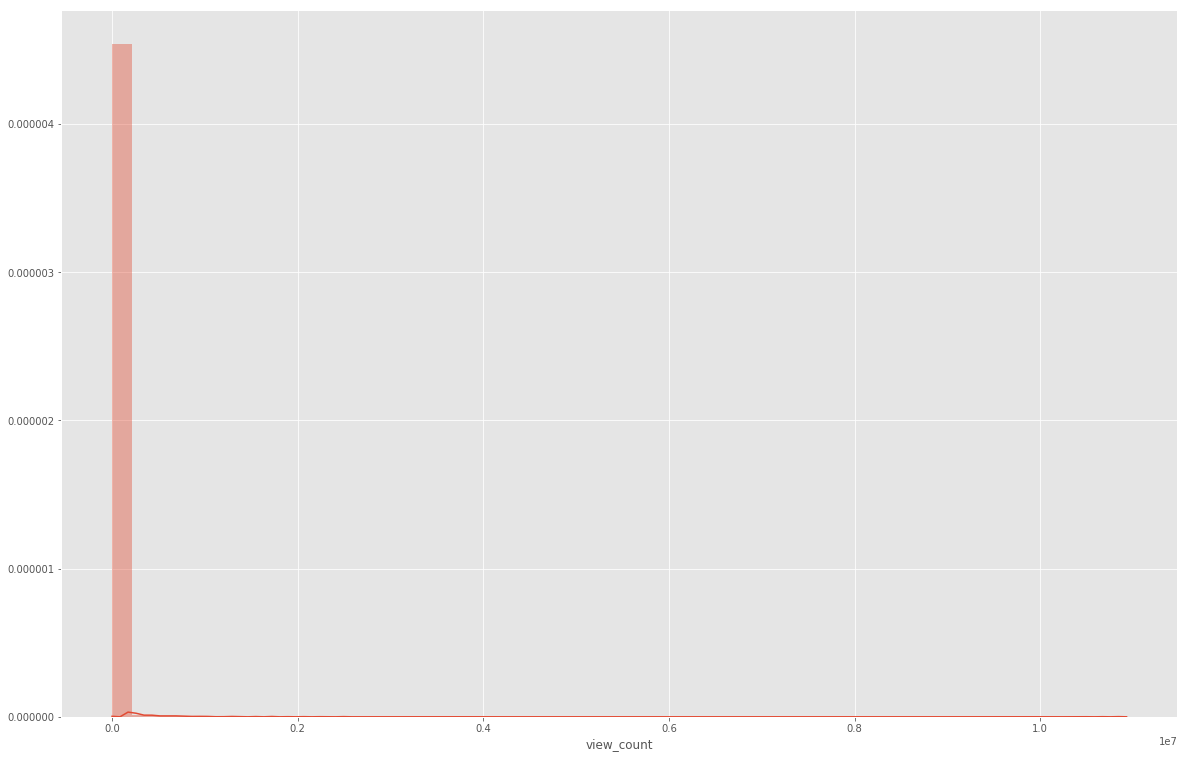

In [74]:
sns.distplot(df['view_count'])

In [75]:
df.category_id.value_counts()

25    23275
22      749
28      277
24       81
27       30
1        15
17        5
10        3
15        1
26        1
23        1
19        1
2         1
Name: category_id, dtype: int64

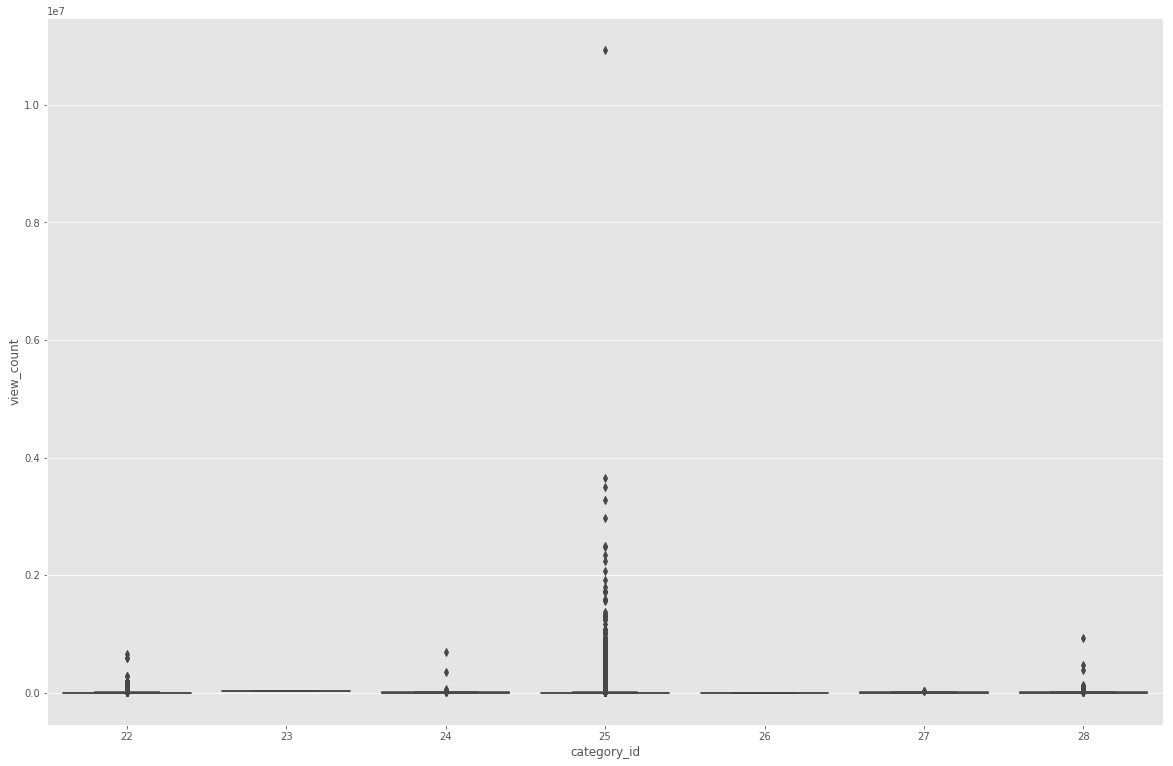

In [76]:
sns.boxplot(x='category_id',y='view_count',data=df[df.category_id > 20])

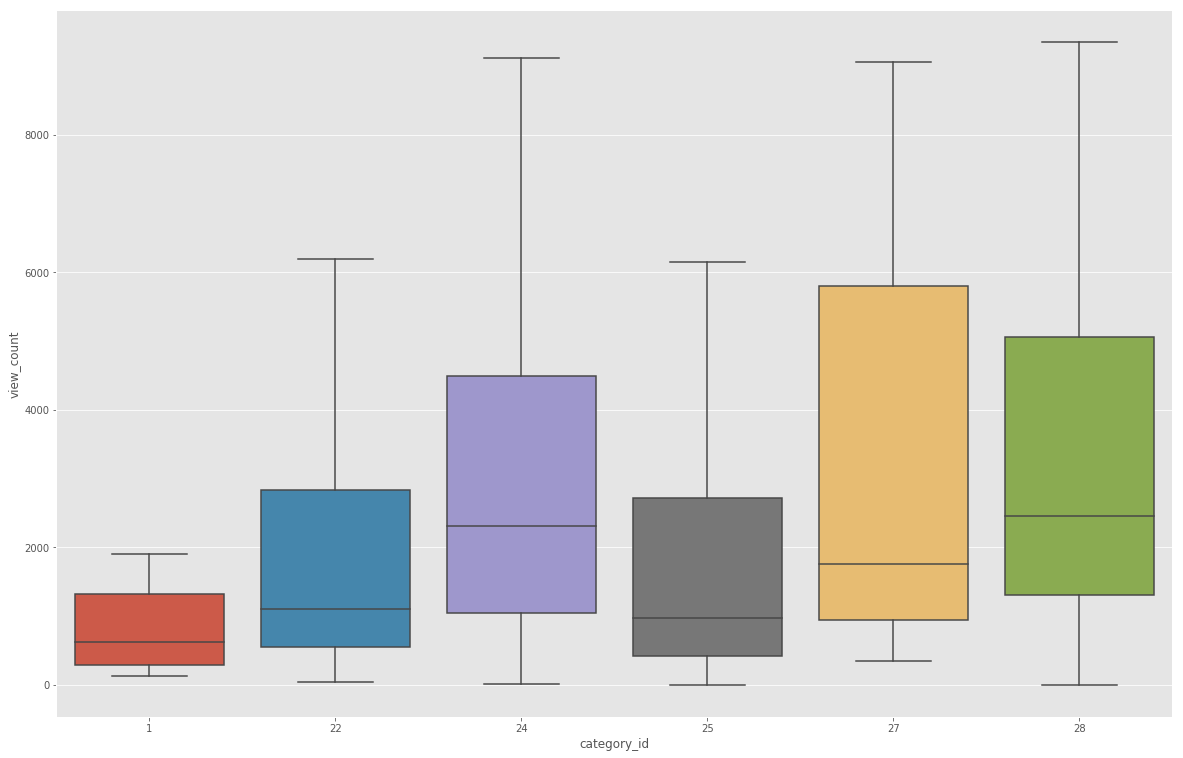

In [124]:
vizdf = df[(df.category_id == 25)
          | (df.category_id == 22)
          | (df.category_id == 28)
          | (df.category_id == 24)
          | (df.category_id == 27)
          | (df.category_id == 1)]

ax=sns.boxplot(x='category_id', y='view_count', data=vizdf, showfliers=False)
ax.set_xlabels = ['Film & Animation', 'People & Blogs', 'Entertainment', 'News & Politics', 'Education', 'Science & Technology']
plt.show()

D:\ProgramFiles\Anaconda3\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
D:\ProgramFiles\Anaconda3\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
D:\ProgramFiles\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
D:\ProgramFiles\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


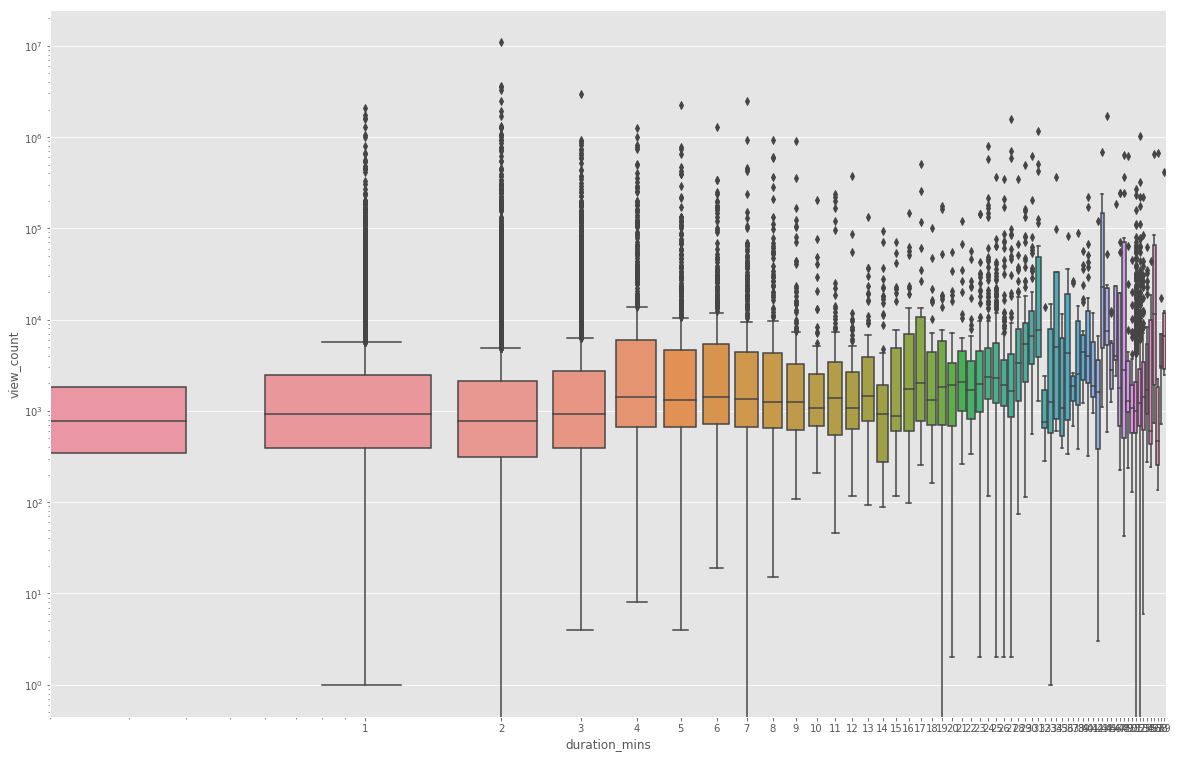

In [78]:
f, ax = plt.subplots(figsize=(20, 13))
ax.set(xscale="log", yscale="log")
sns.boxplot("duration_mins", "view_count", data=df, ax=ax)

In [127]:
df['binned_duration'], bins = pd.cut(df.duration_mins,24,retbins=True)
print(bins)
df.binned_duration.value_counts()

[-0.059       2.45833333  4.91666667  7.375       9.83333333 12.29166667
 14.75       17.20833333 19.66666667 22.125      24.58333333 27.04166667
 29.5        31.95833333 34.41666667 36.875      39.33333333 41.79166667
 44.25       46.70833333 49.16666667 51.625      54.08333333 56.54166667
 59.        ]


(-0.059, 2.458]     14602
(2.458, 4.917]       3727
(49.167, 51.625]     1425
(4.917, 7.375]       1406
(51.625, 54.083]      562
(24.583, 27.042]      461
(7.375, 9.833]        444
(22.125, 24.583]      321
(9.833, 12.292]       304
(27.042, 29.5]        261
(19.667, 22.125]      161
(12.292, 14.75]       150
(14.75, 17.208]       137
(29.5, 31.958]         98
(17.208, 19.667]       88
(39.333, 41.792]       59
(46.708, 49.167]       59
(36.875, 39.333]       58
(41.792, 44.25]        29
(31.958, 34.417]       24
(34.417, 36.875]       17
(56.542, 59.0]         17
(44.25, 46.708]        16
(54.083, 56.542]       14
Name: binned_duration, dtype: int64

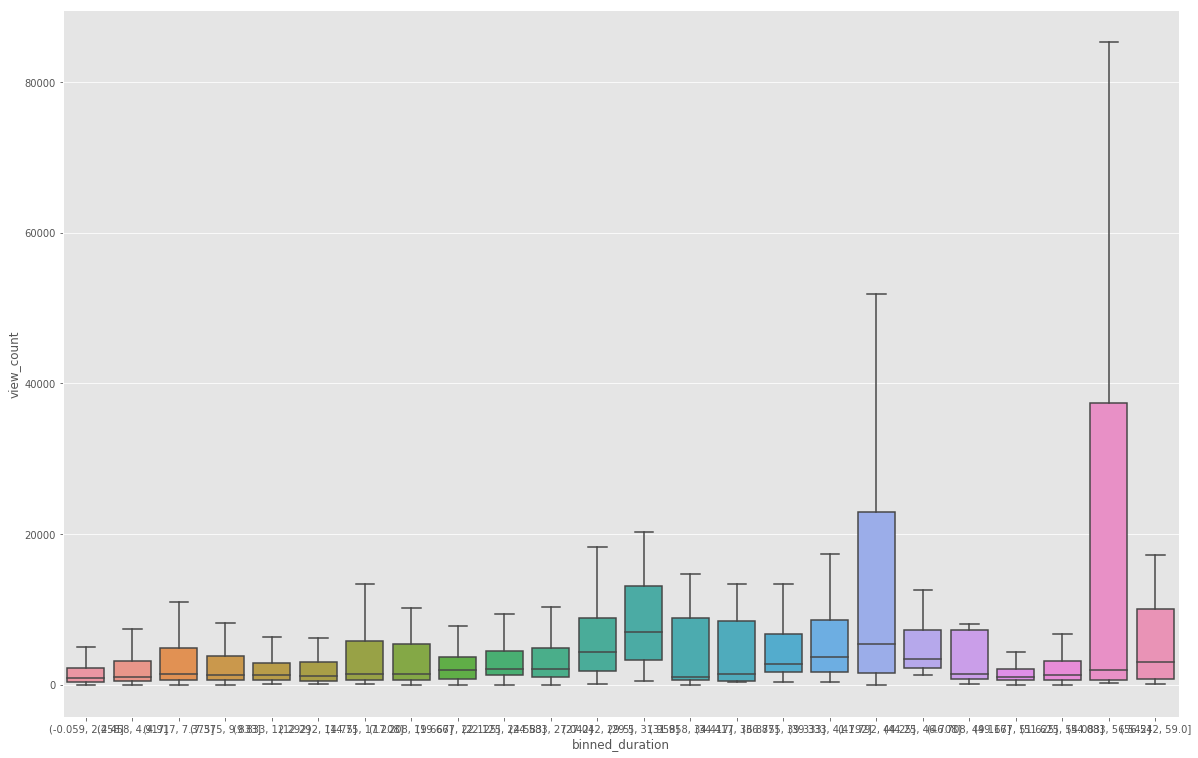

In [128]:
sns.boxplot(x='binned_duration', y='view_count',data=df,showfliers=False)

In [81]:
df['publish_hour'] = pd.DatetimeIndex(df.published_at).hour
df['publish_day'] = pd.DatetimeIndex(df.published_at).dayofweek
df['publish_month'] = pd.DatetimeIndex(df.published_at).month
df['publish_year'] = pd.DatetimeIndex(df.published_at).year

In [82]:
df.publish_hour.value_counts()

16    2860
11    2648
17    2630
12    2568
10    2471
13    2168
15    2089
14    1937
18    1670
9     1058
19     993
20     429
8      220
21     150
6      103
23      92
22      86
7       83
4       61
5       38
0       32
3       28
1       17
2        9
Name: publish_hour, dtype: int64

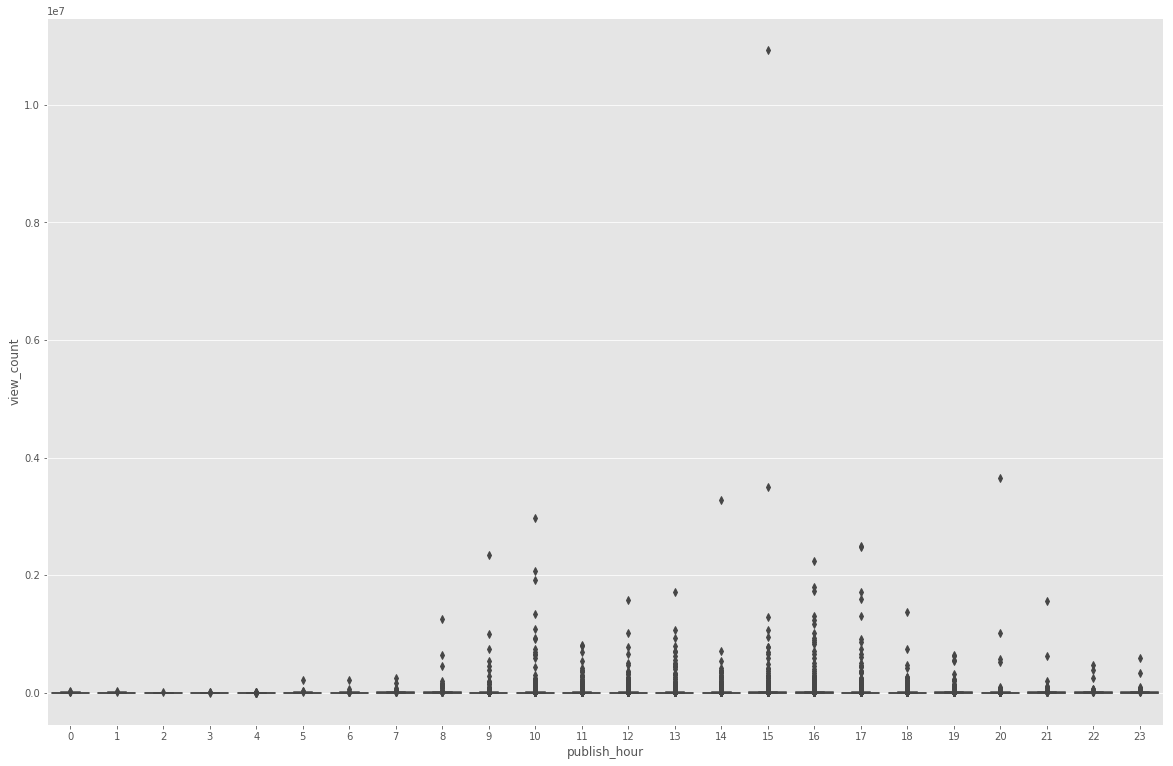

In [83]:
sns.boxplot(x='publish_hour',y='view_count',data=df,showfliers=True)

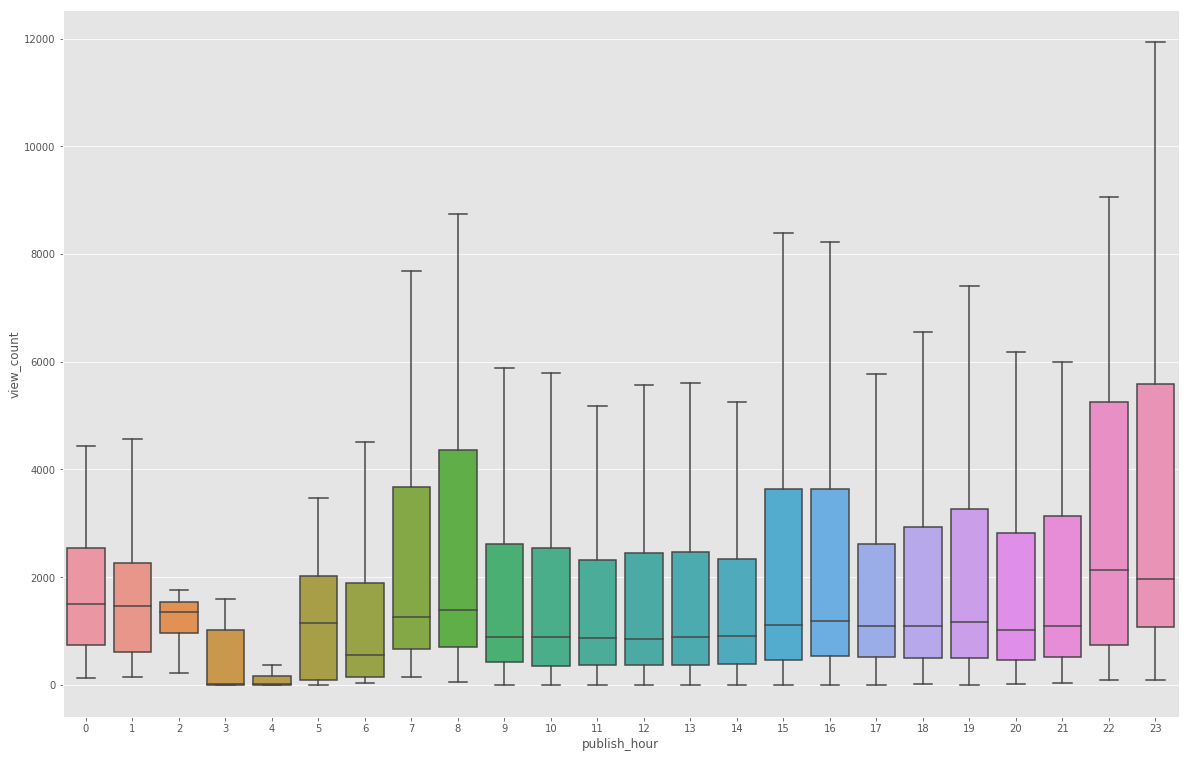

In [84]:
sns.boxplot(x='publish_hour',y='view_count',data=df,showfliers=False)

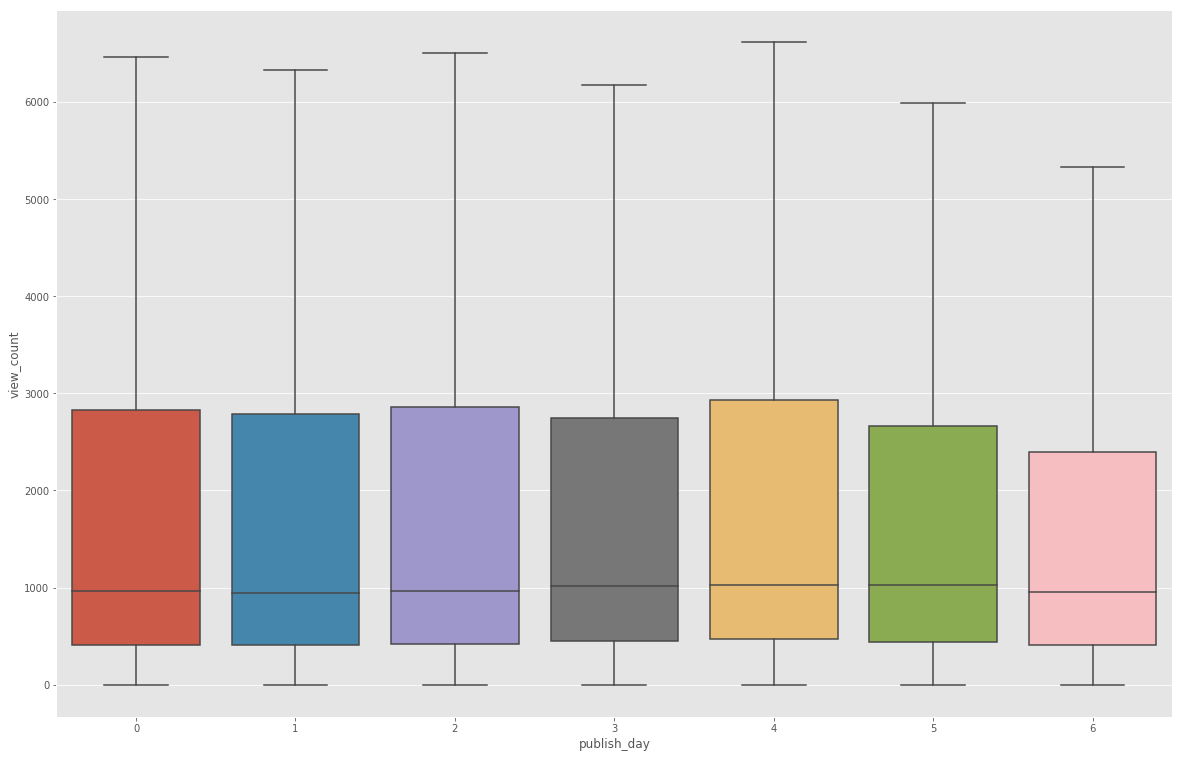

In [87]:
sns.boxplot(x='publish_day',y='view_count',data=df,showfliers=False)

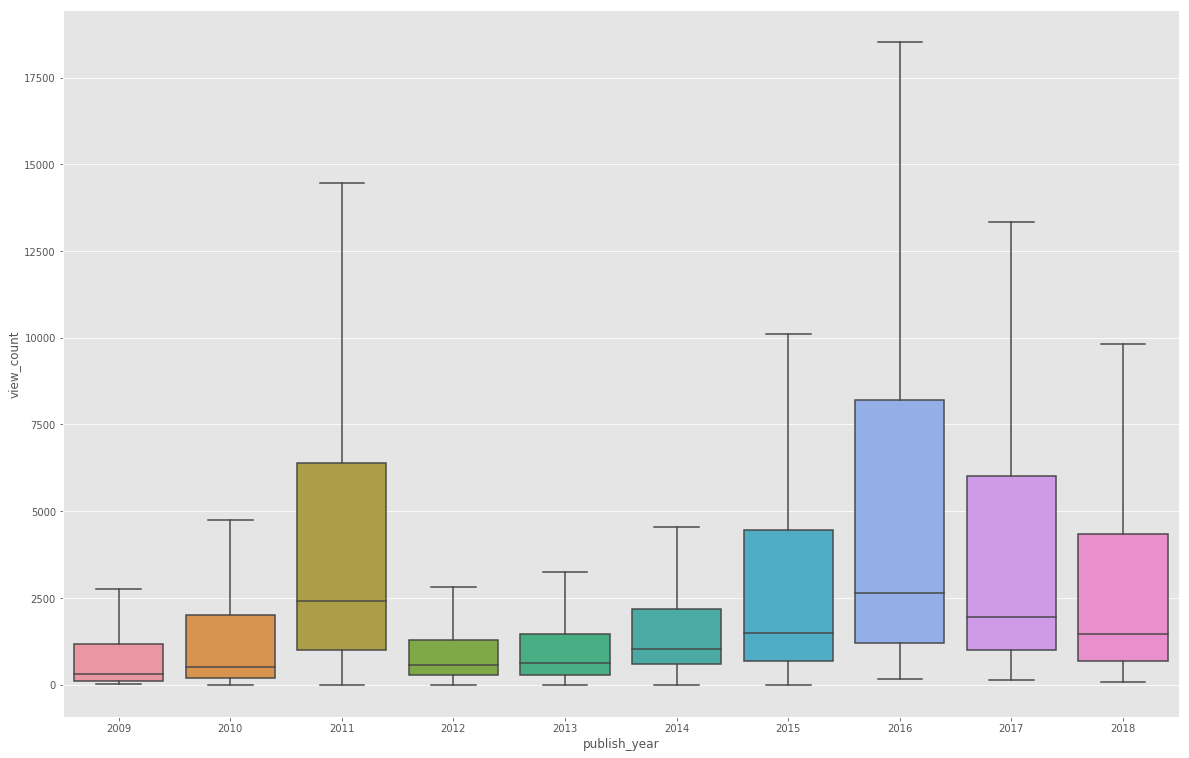

In [129]:
sns.boxplot(x='publish_year',y='view_count',data=df,showfliers=False)

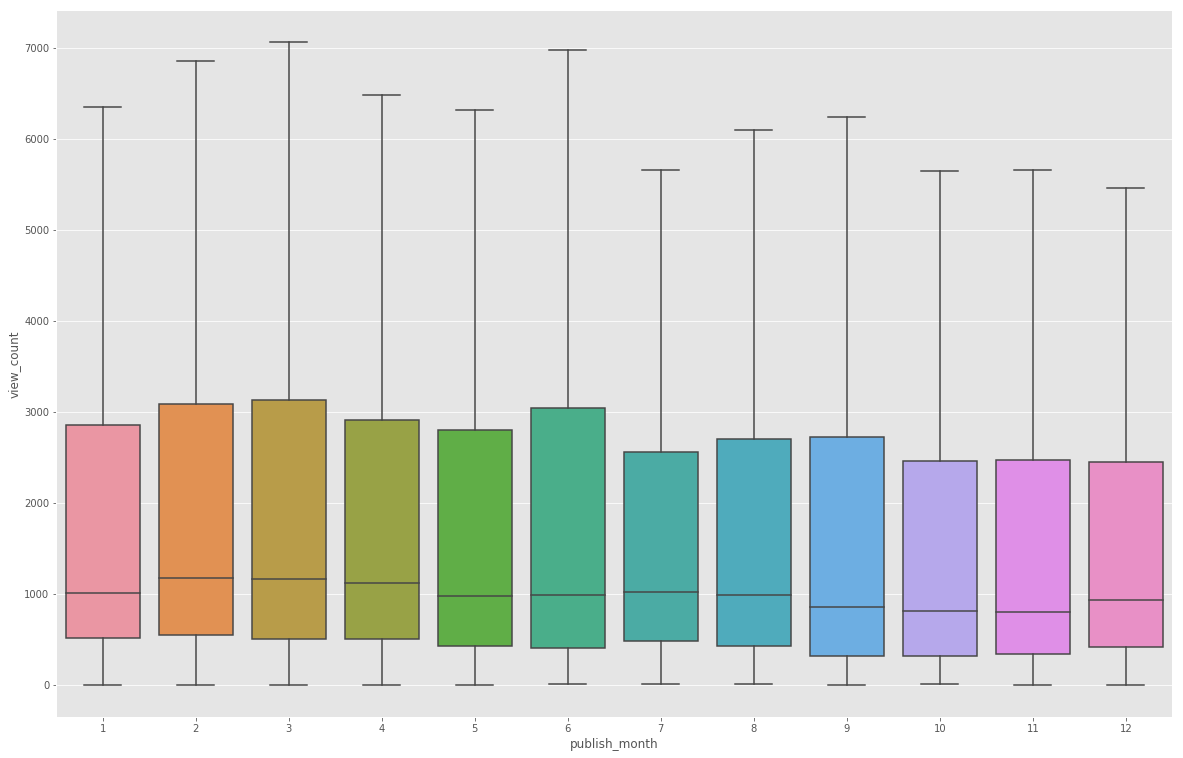

In [98]:
sns.boxplot(x='publish_month',y='view_count',data=df,showfliers=False)

In [101]:
df['published_at'] = pd.to_datetime(df.published_at)
df['publish_date'] = df.published_at.map(lambda x: x.strftime('%Y-%m-%d'))
df.head()

,Unnamed: 0,id,title,description,category_id,view_count,like_count,dislike_count,favorite_count,comment_count,...,duration_hours,duration_mins,duration_secs,was_live,binned_duration,publish_hour,publish_day,publish_month,publish_year,publish_date
0,0,Cir7oZV7T9A,هل هناك فعلاً نية لإنشاء حلف عسكري عربي على غر...,"""المشكلة الأساسية في خلق تحالف عسكري عربي هي ...",22,267.0,26.0,3.0,0,6.0,...,0,2,9,False,"(-0.059, 4.917]",15,5,7,2018,2018-07-28
1,1,Cj5v_gXyJ_o,بتوقيت مصر : لقاء مع المحامية مها أبو بكر حول ...,للمزيد من الفيديوهات زوروا صفحتنا http://www.b...,25,189.0,21.0,1.0,0,2.0,...,0,9,56,False,"(4.917, 9.833]",16,5,7,2018,2018-07-28
2,2,dkc8WdGnO6w,بتوقيت مصر : لقاء مع النائب أحمد طنطاوي حول ال...,للمزيد من الفيديوهات زوروا صفحتنا http://www.b...,25,199.0,21.0,2.0,0,7.0,...,0,14,58,False,"(9.833, 14.75]",13,5,7,2018,2018-07-28
3,3,6NH6HBAh_8s,بتوقيت مصر : مناقشة حول مشروع قانون تنظيم الصح...,للمزيد من الفيديوهات زوروا صفحتنا http://www.b...,25,187.0,8.0,3.0,0,4.0,...,0,24,0,False,"(19.667, 24.583]",13,5,7,2018,2018-07-28
4,4,OKc1HL1KoEM,#نيمار يُثير الجدل بتدخل عنيف على لاعب صغير يد...,#نيمار يُثير الجدل بتدخل عنيف على لاعب صغير يد...,22,5977.0,115.0,32.0,0,15.0,...,0,1,20,False,"(-0.059, 4.917]",19,4,7,2018,2018-07-27


In [103]:
view_count = df[['view_count','publish_date']].groupby(by='publish_date').sum()
view_count.head()

,view_count
publish_date,
2009-07-30,2226.0
2009-07-31,7157.0
2009-08-01,6506.0
2009-08-02,3327.0
2009-08-03,1172.0


In [106]:
videos_count = df[['publish_date','published_at']].groupby(by='publish_date').count()
videos_count['num_of_videos'] = videos_count['published_at']
videos_count.head()

,published_at,num_of_videos
publish_date,,
2009-07-30,5,5
2009-07-31,5,5
2009-08-01,6,6
2009-08-02,3,3
2009-08-03,4,4


D:\ProgramFiles\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


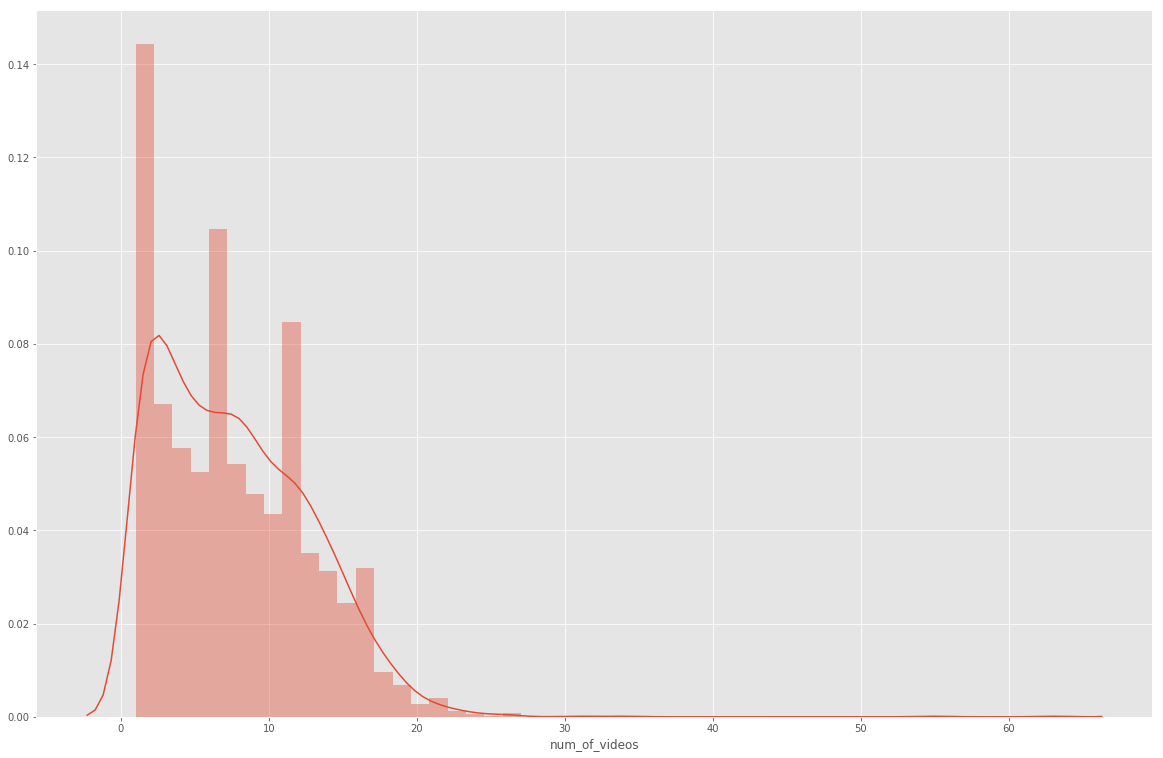

In [107]:
sns.distplot(videos_count['num_of_videos'])

In [111]:
production = pd.concat([videos_count, view_count],axis=1)
production.describe()

,published_at,num_of_videos,view_count
count,3173.000000,3173.000000,3.173000e+03
mean,7.702490,7.702490,8.242383e+04
std,5.157517,5.157517,3.036077e+05
min,1.000000,1.000000,2.000000e+00
25%,3.000000,3.000000,7.260000e+03
50%,7.000000,7.000000,1.918400e+04
75%,11.000000,11.000000,5.544100e+04
max,63.000000,63.000000,1.132842e+07


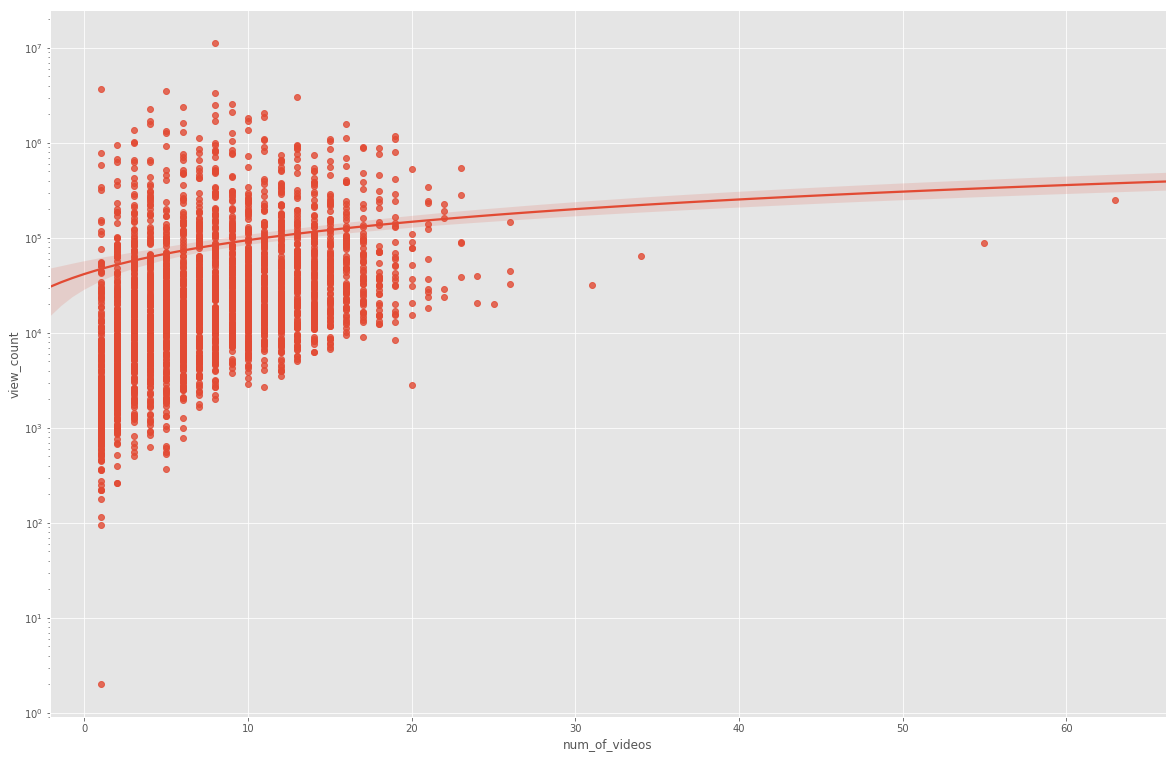

In [115]:
f, ax = plt.subplots(figsize=(20, 13))
ax.set(xscale="linear", yscale="log")
sns.regplot(x='num_of_videos',y='view_count',data=production,ax=ax)